# Player Unknown Battle Ground

https://www.kaggle.com/code/carlolepelaars/pubg-data-exploration-rf-funny-gifs#Preparation-for-Machine-Learning-

### Data fields
`DBNOs` - Number of enemy players knocked.  
`assists` - Number of enemy players this player damaged that were killed by teammates.  
`boosts` - Number of boost items used.  
`damageDealt` - Total damage dealt. Note: Self inflicted damage is subtracted.  
`headshotKills` - Number of enemy players killed with headshots.  
`heals` - Number of healing items used.  
`Id` - Player’s Id
`killPlace` - Ranking in match of number of enemy players killed.  
`killPoints` - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  
`killStreaks` - Max number of enemy players killed in a short amount of time.  
`kills` - Number of enemy players killed.  
`longestKill` - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
`matchDuration` - Duration of match in seconds.  
`matchId` - ID to identify match. There are no matches that are in both the training and testing set.  
`matchType` - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  
`rankPoints` - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.  
`revives` - Number of times this player revived teammates.  
rideDistance - Total distance traveled in vehicles measured in meters.  
`roadKills` - Number of kills while in a vehicle.  
`swimDistance` - Total distance traveled by swimming measured in meters.  
`teamKills` - Number of times this player killed a teammate.  
`vehicleDestroys` - Number of vehicles destroyed.  
`walkDistance` - Total distance traveled on foot measured in meters.  
`weaponsAcquired` - Number of weapons picked up.
`winPoints` - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
`groupId` - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
`numGroups` - Number of groups we have data for in the match.  
`maxPlace` - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
`winPlacePerc` - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Drive 연결

In [1]:
from google.colab import drive

In [2]:
drive.mount('./content')

Mounted at ./content


# 데이터 불러오기

In [7]:
path = "content/MyDrive/Colab Notebooks/data"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_df = pd.read_csv(path + "/train_V2.csv")
test_df = pd.read_csv(path + "/test_V2.csv")

In [ ]:
train_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
test_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [11]:
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [14]:
sns.set_style('whitegrid')

<Figure size 640x480 with 0 Axes>

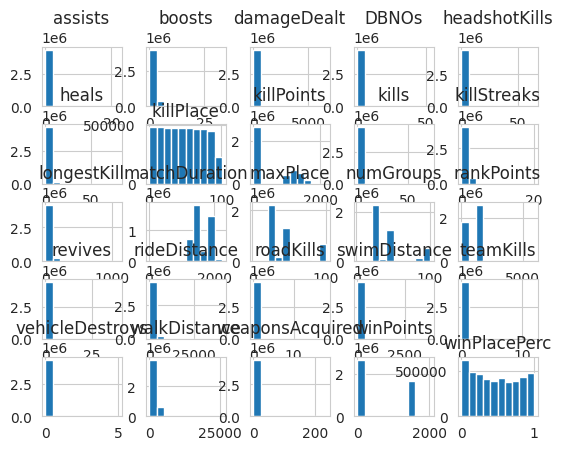

In [15]:
plt.subplots_adjust(wspace=.3, hspace=.6)
train_df.hist();

In [16]:
# Check row with NaN value
train_df[train_df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [17]:
train_df['winPlacePerc'].isnull().sum()

1

In [18]:
# Drop row with NaN 'winPlacePerc' value
train_df.drop(2744604, inplace=True)

In [19]:
train_df['winPlacePerc'].isnull().sum()

0

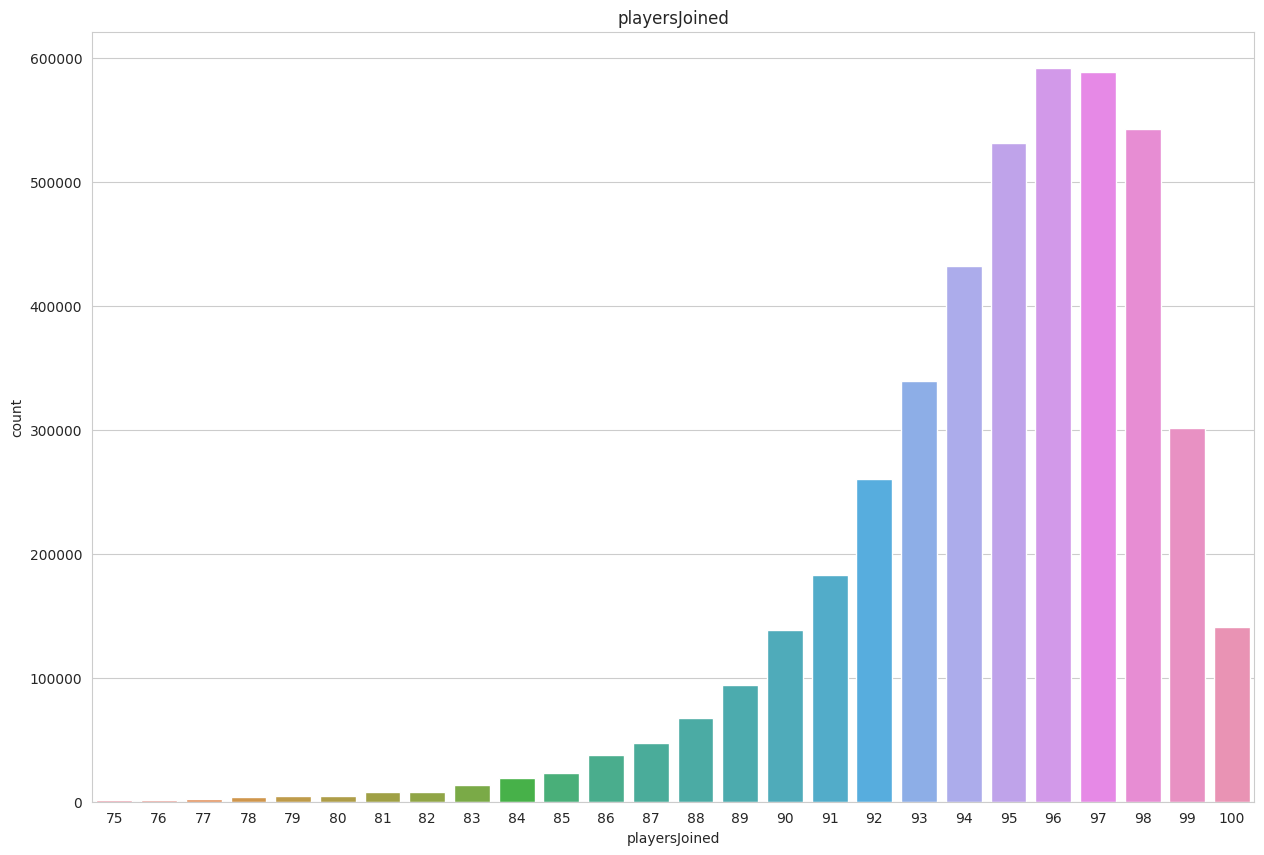

In [22]:
# playersJoined
train_df['playersJoined'] = train_df.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(x=train_df[train_df['playersJoined']>=75]['playersJoined'], data=train_df)
plt.title('playersJoined')
plt.show()

There are a few matches with fewer than 75 players that are not displayed here.  

you can see most of the matches are nearly packed a have nearly 100 players.  

### Normalize features

1. kills
2. damageDealt
3. maxPlace
4. matchDuration

In [23]:
train_df['killsNorm'] = train_df['kills']*((100-train_df['playersJoined'])/100 + 1)
train_df['damageDealtNorm'] = train_df['damageDealt']*((100-train_df['playersJoined'])/100 + 1)
train_df['maxPlaceNorm'] = train_df['maxPlace']*((100-train_df['playersJoined'])/100 + 1)
train_df['matchDurationNorm'] = train_df['matchDuration']*((100-train_df['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train_df[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


### Heals and Boosts

we can always delete it later if the feature importance according to our random forest model is too low.

In [24]:
train_df['healsandboosts'] = train_df['heals'] + train_df['boosts']
train_df[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


### Killing without moving
We try to identify cheaters by checking if people are getting kills without moving.

We will remove cheaters in our outlier detection section.

In [25]:
train_df['totalDistance'] = train_df['rideDistance'] + train_df['walkDistance'] + train_df['swimDistance']

# Create feature killsWithoutMoving
train_df['killsWithoutMoving'] = ((train_df['kills'] > 0) & (train_df['totalDistance'] == 0))

In [27]:
train_df['killsWithoutMoving'].value_counts()

False    4445430
True        1535
Name: killsWithoutMoving, dtype: int64

In [28]:
train_df['headshot_rate'] = train_df['headshotKills'] / train_df['kills']
train_df['headshot_rate'] = train_df['headshot_rate'].fillna(0)

In [34]:
train_df['headshot_rate'].value_counts()

0.000000    3696115
1.000000     254068
0.500000     196009
0.333333     104061
0.250000      53362
             ...   
0.433333          1
0.775000          1
0.127273          1
0.653846          1
0.736842          1
Name: headshot_rate, Length: 263, dtype: int64

### Kills without movement
 if the player managed to get kills without moving it is most likely a cheater.

In [35]:
display(train_df[train_df['killsWithoutMoving'] == True].shape)
train_df[train_df['killsWithoutMoving'] == True].head(10)

(1535, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.8571,58,8.52,842.0600,21.30,842.06,3,0.0,True,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.6000,42,4.74,547.6280,17.38,2834.52,6,0.0,True,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.8947,21,35.80,3132.5000,35.80,1607.42,5,0.0,True,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0000,73,1.27,200.4060,24.13,1014.73,0,0.0,True,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.3000,42,1.58,158.0000,17.38,2834.52,0,0.0,True,1.000000
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.8000,44,9.36,789.5160,9.36,909.48,3,0.0,True,0.166667
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.6000,48,18.24,1708.4800,9.12,836.00,1,0.0,True,0.333333
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.8571,57,10.01,757.7570,21.45,856.57,11,0.0,True,0.285714
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.2857,61,2.78,179.1710,11.12,1017.48,7,0.0,True,0.500000
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.8571,53,1.47,125.7732,22.05,1051.05,0,0.0,True,0.000000


In [36]:
# Remove outliers
train_df.drop(train_df[train_df['killsWithoutMoving'] == True].index, inplace=True)

### Anomalies in roadKills
>  [ ə|nɒməli ] 변칙, 이례

In [38]:
# Players who got more than 10 roadKills
train_df[train_df['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302,False,0.000000
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600,False,0.000000
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000,False,0.050000
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000,False,0.277778


In [40]:
# Drop roadKill 'cheaters'
train_df.drop(train_df[train_df['roadKills'] > 10].index, inplace=True)

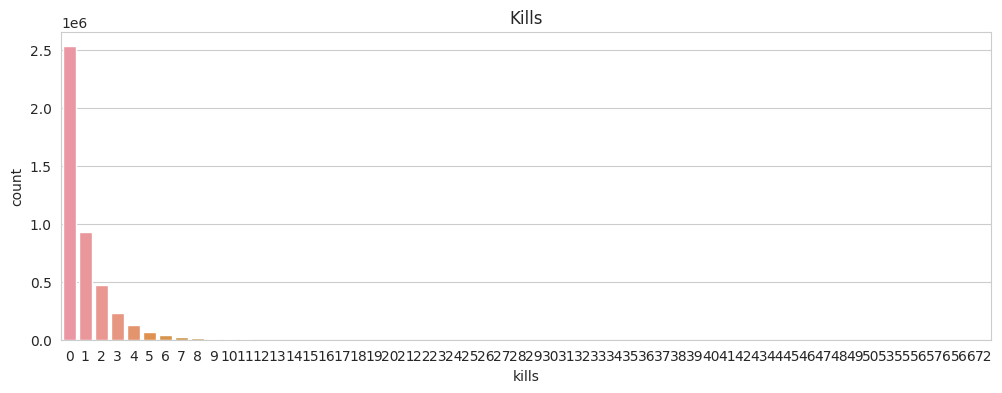

In [42]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=train_df, x=train_df['kills']).set_title('Kills')
plt.show()

In [43]:
# Players who got more than 30 kills
display(train_df[train_df['kills'] > 30].shape)
train_df[train_df['kills'] > 30].head(10)

(95, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,1.0000,11,122.85,12504.24,20.79,3398.22,5,1036.00,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,1.0000,13,72.93,7169.58,24.31,3356.65,5,124.20,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,1.0000,38,53.46,4709.34,8.10,1339.74,2,382.40,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1.0000,20,59.40,5499.00,32.40,1605.60,0,35.30,False,0.272727
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,0.2308,54,49.64,5042.84,20.44,1749.08,4,111.10,False,0.264706


In [44]:
# Remove outliers
train_df.drop(train_df[train_df['kills'] > 30].index, inplace=True)

### Anomalies in aim part 2 (100% headshot rate)

We see that the most players score in the 0 to 10% region.

<ipython-input-45-1b1d67635ca7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['headshot_rate'], bins=10)


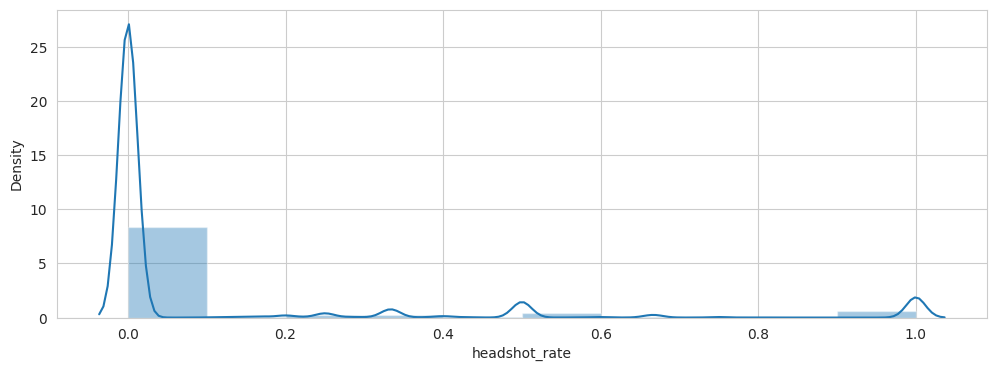

In [45]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,4))
sns.distplot(train_df['headshot_rate'], bins=10)
plt.show()

However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!

In [47]:
# Players who made a minimum of 10 kills and have a headshot_rate of 100%
display(train_df[(train_df['headshot_rate'] == 1) & (train_df['kills'] > 9)].shape)
train_df[(train_df['headshot_rate'] == 1) & (train_df['kills'] > 9)].head(10)

(24, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,1.0000,95,11.55,1278.90,29.40,1912.05,8,8178.0,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,1.0000,97,10.30,1096.95,27.81,1283.38,5,2858.9,False,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,1.0000,93,12.84,1411.33,29.96,1851.10,6,5963.0,False,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,1.0000,88,12.32,1288.00,51.52,1397.76,5,3108.0,False,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,1.0000,96,13.52,1537.12,50.96,1434.16,12,2479.8,False,1.0


### Anomalies in aim part 3 (Longest kill)
Most kills are made from a distance of 100 meters or closer.  
There are however some outliers who make a kill from `more than 1km away`.

<ipython-input-48-ea5cc547103a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['longestKill'], bins=10)


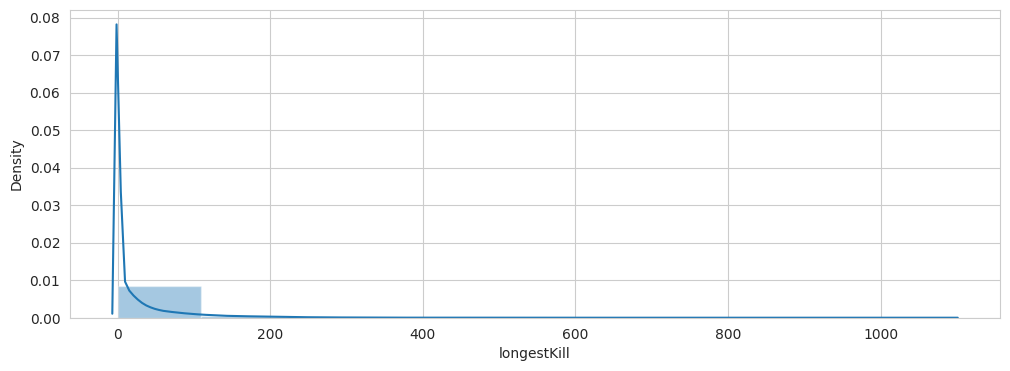

In [48]:
# Plot the distribution of longestKill
plt.figure(figsize=(12,4))
sns.distplot(train_df['longestKill'], bins=10)
plt.show()

In [49]:
# Check out players who made kills with a distance of more than 1 km
display(train_df[train_df['longestKill'] >= 1000].shape)
train_df[train_df['longestKill'] >= 1000].head(10)

(20, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.9231,88,4.48,877.968,30.24,2087.68,4,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.5385,29,18.81,2195.640,23.94,2236.68,7,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1.0000,51,14.90,1531.720,19.37,1040.02,0,2981.00,False,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.6000,41,25.44,2241.900,9.54,1734.69,0,29.21,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.0000,61,1.39,273.552,11.12,654.69,0,3159.00,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.9091,86,11.40,1153.680,13.68,1163.94,0,569.50,False,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.2857,58,4.26,467.606,11.36,825.02,3,832.50,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.9412,52,22.20,2427.200,76.96,1827.80,6,2848.00,False,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.5000,28,39.56,3617.160,25.80,3092.56,13,235.30,False,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.6000,42,17.38,2057.160,17.38,2834.52,8,133.20,False,0.545455


In [50]:
# Remove outliers
train_df.drop(train_df[train_df['longestKill'] >= 1000].index, inplace=True)

In [51]:
# Summary statistics for the Distance features
train_df[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445311e+06,4.445311e+06,4.445311e+06,4.445311e+06
mean,1.154628e+03,6.063272e+02,4.510977e+00,1.765466e+03
std,1.183514e+03,1.498567e+03,3.050773e+01,2.183257e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.864000e+02,0.000000e+00,0.000000e+00,7.893000e+02
75%,1.977000e+03,2.606500e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


### walkDistance

<ipython-input-52-9f760becf586>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['walkDistance'], bins=10)


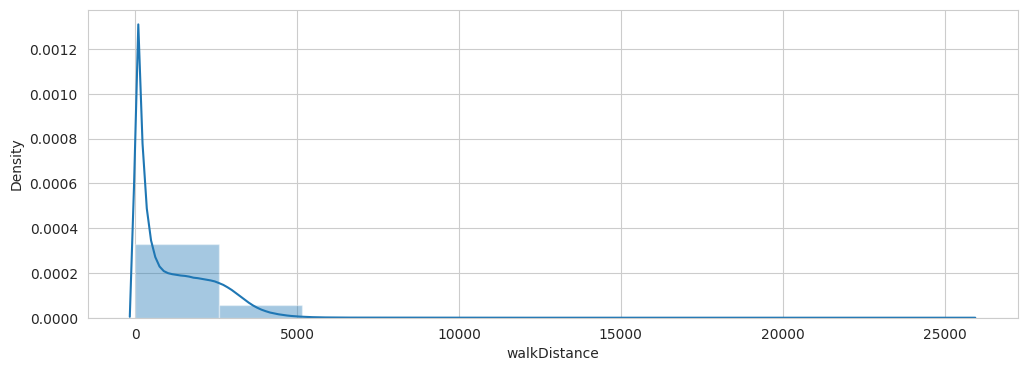

In [52]:
# Plot the distribution of walkDistance
plt.figure(figsize=(12,4))
sns.distplot(train_df['walkDistance'], bins=10)
plt.show()

In [53]:
# walkDistance anomalies
display(train_df[train_df['walkDistance'] >= 10000].shape)
train_df[train_df['walkDistance'] >= 10000].head(10)

(219, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.73,0,0,7,47,...,0.7340,95,0.00,39.6165,99.75,2054.85,11,12828.7978,False,0.0
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,0.6957,94,0.00,0.0000,49.82,2091.38,2,12223.8100,False,0.0
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3,0.00,0,0,0,41,...,0.9333,91,0.00,0.0000,99.19,2028.49,3,14918.2000,False,0.0
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3,0.00,0,0,13,46,...,0.8602,94,0.00,0.0000,99.64,2038.38,16,12636.7000,False,0.0
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4,52.16,0,0,7,25,...,0.8936,95,1.05,54.7680,50.40,1927.80,11,10889.8614,False,0.0


### rideDistance

<ipython-input-54-1e91d01e79de>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['rideDistance'], bins=10)


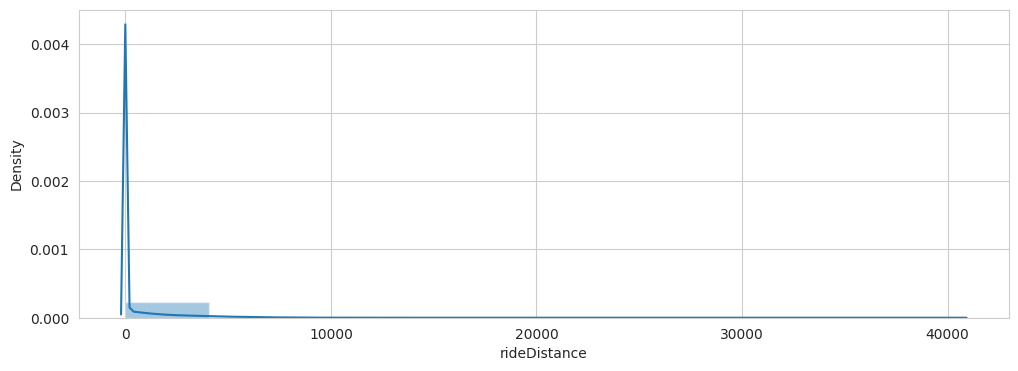

In [54]:
# Plot the distribution of rideDistance
plt.figure(figsize=(12,4))
sns.distplot(train_df['rideDistance'], bins=10)
plt.show()

In [55]:
# rideDistance anomalies
display(train_df[train_df['rideDistance'] >= 20000].shape)
train_df[train_df['rideDistance'] >= 20000].head(10)

(150, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.20,0,0,1,30,...,0.6421,96,1.04,103.1680,99.84,1969.76,1,26306.60,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.00,0,0,0,55,...,0.5376,94,0.00,0.0000,99.64,2004.46,0,22065.40,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.00,0,0,0,26,...,0.8878,99,1.01,101.0000,99.99,1947.28,0,28917.50,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.00,0,0,0,46,...,0.7917,97,0.00,0.0000,99.91,1861.21,0,21197.20,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.20,0,1,2,2,...,0.9785,94,7.42,824.8920,99.64,1986.44,9,26733.20,False,0.142857
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.55,0,0,0,53,...,0.5000,89,0.00,13.9305,98.79,2107.89,0,21293.23,False,0.000000
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.00,0,0,1,47,...,0.7447,96,0.00,0.0000,49.92,1995.76,2,29267.30,False,0.000000
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.92,1,0,0,45,...,0.6875,96,0.00,75.8368,50.96,1953.12,0,21942.10,False,0.000000
403647,c65da7b3fceef5,814d1b3736e276,ff9f570b555d48,0,2,0.00,0,0,3,54,...,0.6739,94,0.00,0.0000,49.82,1930.26,5,21198.20,False,0.000000
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.00,0,0,2,43,...,0.8171,83,0.00,0.0000,97.11,2348.19,4,32362.10,False,0.000000


In [56]:
# Remove outliers
train_df.drop(train_df[train_df['rideDistance'] >= 20000].index, inplace=True)

### swimDistance

<ipython-input-57-950c208c35aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['swimDistance'], bins=10)


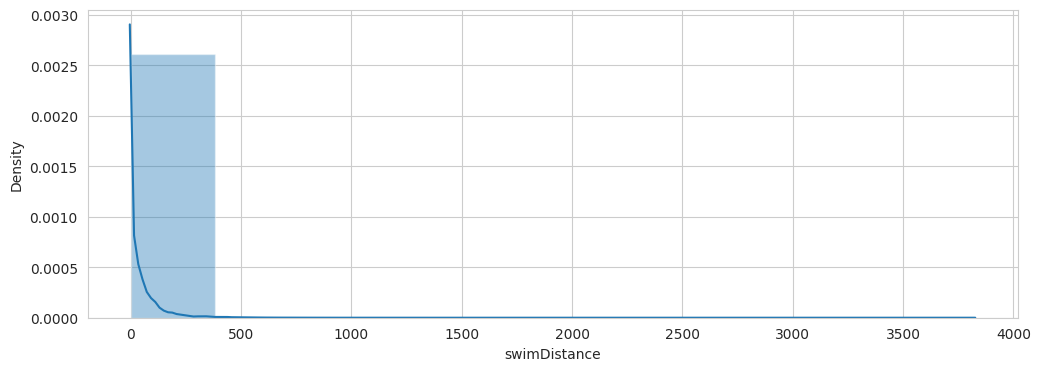

In [57]:
# Plot the distribution of swimDistance
plt.figure(figsize=(12,4))
sns.distplot(train_df['swimDistance'], bins=10)
plt.show()

In [58]:
# Players who swam more than 2 km
train_df[train_df['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,0.9592,98,0.00,79.6824,51.00,1426.98,6,3297.000,False,0.000000
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,0.9600,94,0.00,56.5192,27.56,2319.28,20,10113.000,False,0.000000
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,1.0000,88,3.36,563.3600,29.12,2124.64,2,10740.000,False,1.000000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,1.0000,98,5.10,359.3460,49.98,1423.92,13,3083.100,False,0.200000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,1.0000,86,2.28,671.6880,13.68,1163.94,2,4818.300,False,0.500000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,0.5833,87,0.00,0.0000,28.25,1567.31,0,5314.000,False,0.000000
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,0.8511,96,0.00,51.5736,49.92,1434.16,8,9899.000,False,0.000000
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,1.0000,91,3.27,517.0960,29.43,1318.90,1,2394.546,False,0.000000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,0.9600,94,7.42,894.4280,27.56,2319.28,6,9926.000,False,0.714286
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,0.2143,96,0.00,0.0000,30.16,1426.88,0,4088.000,False,0.000000


In [59]:
# Remove outliers
train_df.drop(train_df[train_df['swimDistance'] >= 2000].index, inplace=True)

### Anomalies in supplies (weaponsAcquired)
Most people acquire between 0 and 10 weapons in a game

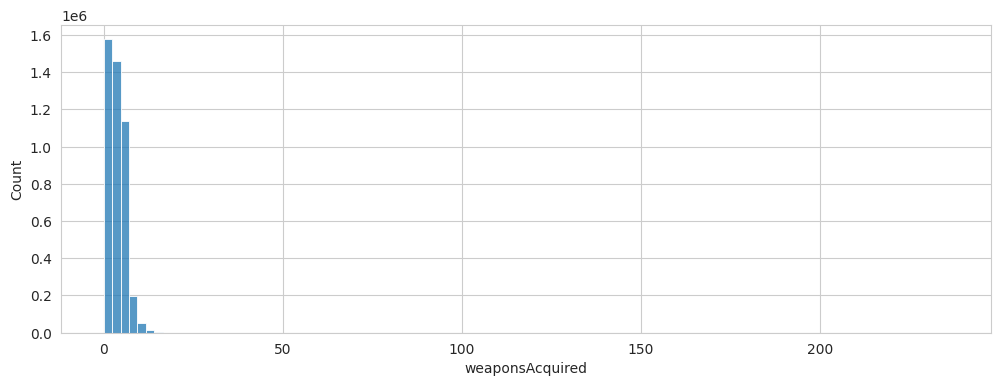

In [60]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(12,4))
sns.histplot(train_df['weaponsAcquired'], bins=100)
plt.show()

In [61]:
# Players who acquired more than 80 weapons
display(train_df[train_df['weaponsAcquired'] >= 80].shape)
train_df[train_df['weaponsAcquired'] >= 80].head()

(19, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.7111,91,0.00,73.1499,50.14,2072.09,0,3187.00,False,0.000000
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.7500,98,0.00,178.8060,29.58,1399.44,3,1687.00,False,0.000000
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0.8929,97,1.03,103.0000,29.87,1895.20,0,5299.21,False,0.000000
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0.5600,80,0.00,0.0000,31.20,1596.00,0,653.10,False,0.000000
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0.2000,11,43.47,3262.1400,20.79,3398.22,0,2888.80,False,0.130435


In [62]:
# Remove outliers
train_df.drop(train_df[train_df['weaponsAcquired'] >= 80].index, inplace=True)

### Anomalies in supplies part 2 (heals)
Most players us 5 healing items or less.

<ipython-input-63-c4fde9eebecd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['heals'], bins=10)


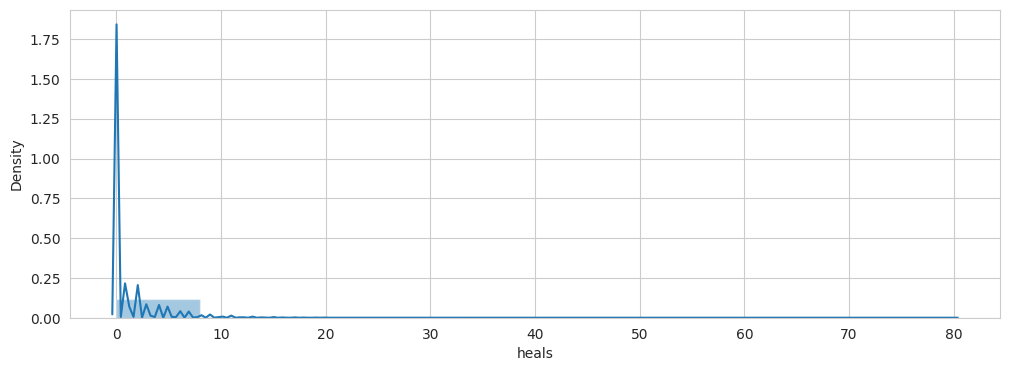

In [63]:
# Distribution of heals
plt.figure(figsize=(12,4))
sns.distplot(train_df['heals'], bins=10)
plt.show()

In [64]:
# 40 or more healing items used
display(train_df[train_df['heals'] >= 40].shape)
train_df[train_df['heals'] >= 40].head(10)

(135, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.9368,96,0.00,0.00,99.84,1868.88,49,6854.000,False,0.000000
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,0.9615,93,1.07,194.74,28.89,1639.24,47,3083.400,False,1.000000
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,0.8333,97,0.00,0.00,99.91,1415.22,54,1343.443,False,0.000000
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.8646,97,0.00,0.00,99.91,1822.07,52,7444.000,False,0.000000
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.8370,93,0.00,0.00,99.51,2009.46,53,5816.000,False,0.000000
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.9259,97,0.00,0.00,28.84,1333.85,44,2439.000,False,0.000000
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.8276,99,0.00,124.23,30.30,1984.65,43,4848.000,False,0.000000
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.9355,95,1.05,183.75,33.60,1425.90,53,3415.600,False,1.000000
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.8889,41,42.93,3733.32,58.83,2857.23,41,268.800,False,0.296296
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,0.9630,94,4.24,295.21,29.68,1915.42,51,4927.000,False,0.250000


In [65]:
# Remove outliers
train_df.drop(train_df[train_df['heals'] >= 40].index, inplace=True)

In [66]:
# Remaining players in the training set
train_df.shape

(4444995, 38)

### colab에서 HTML로
https://cyanindesign.blogspot.com/2021/03/how-to-convert-colab-to-html.html

In [ ]:
%%shell
jupyter nbconvert --to html play_unknownBG.ipynb

[NbConvertApp] Converting notebook play_unknownBG.ipynb to html
[NbConvertApp] Writing 1295530 bytes to play_unknownBG.html
